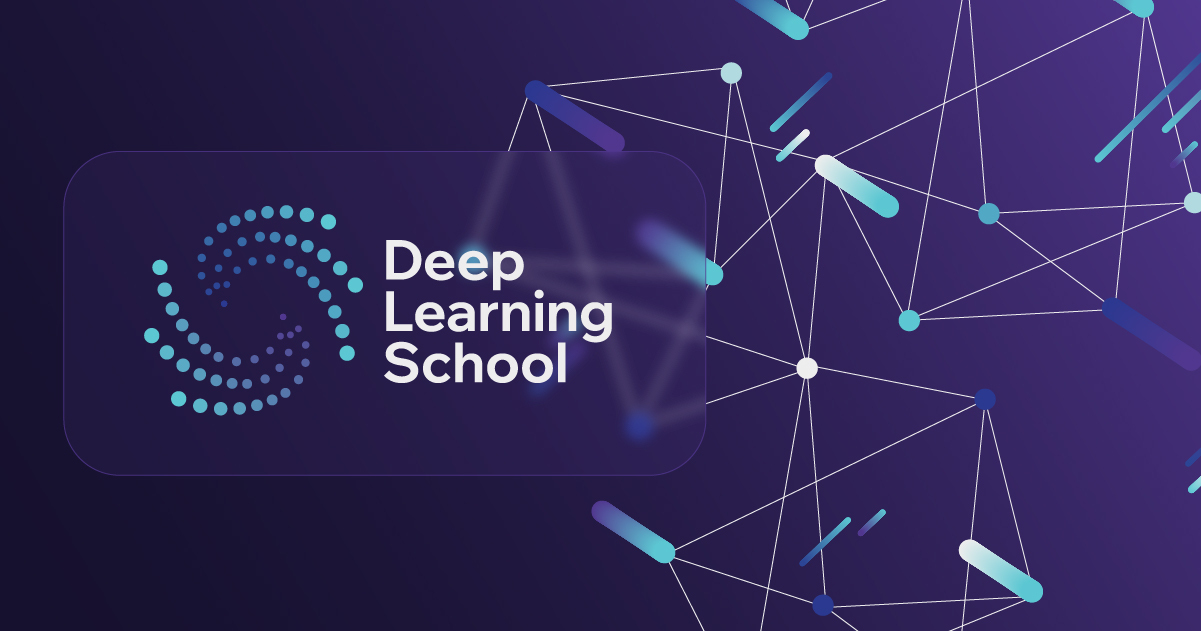

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Решение конкурса на kaggle</b></h1>



Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

**Пишу сначала скрипт, потом уже делаю тетрадь, поэтому везде функции**

# Первая часть. Исследование

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [100]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 120MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 64.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 34.5MB/s]


In [101]:
train_dataset = pd.read_csv('./train.csv')
test_dataset = pd.read_csv('./test.csv')

In [102]:
print(train_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [103]:
print(train_dataset.isna().sum())


ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64


TotalSpent должен быть числовым, ну и пропуски на всякий обработаем

In [104]:
train_dataset['TotalSpent'] = pd.to_numeric(train_dataset['TotalSpent'], errors='coerce')
train_dataset['TotalSpent'] = train_dataset['TotalSpent'].fillna(train_dataset['TotalSpent'].median())

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

# **Кодировка категориальных признаков**

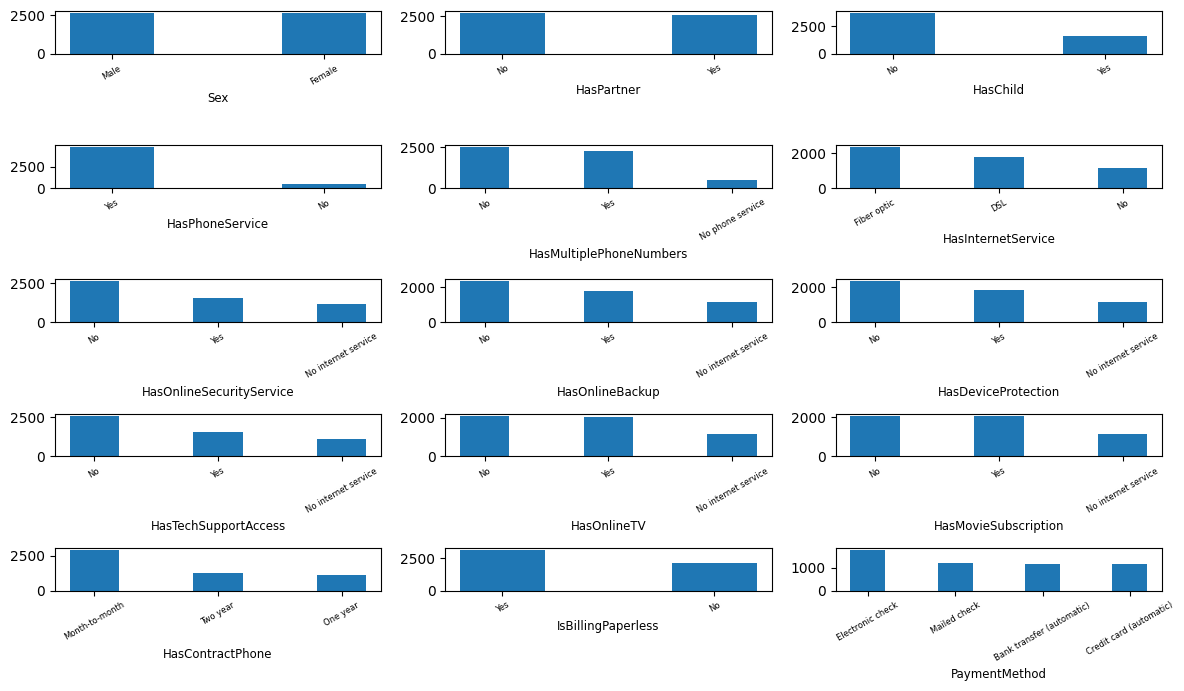

In [105]:
def plot_bars(data, categorical_columns):
    categorical_columns = data.select_dtypes(include=['object']).columns

    n_cols = 3
    n_rows = 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12,  1.4 * n_rows))

    for i, column in enumerate(categorical_columns):
        row = i // n_cols
        col = i % n_cols

        value_counts = data[column].value_counts()

        bars = axes[row][col].bar(value_counts.index.astype(str), value_counts.values, width = 0.4)
        axes[row][col].set_xlabel(column, fontsize = 8.5)
        axes[row][col].tick_params(axis='x', rotation=30, labelsize=6)  # уменьшены метки на оси X

    plt.tight_layout()
    plt.show()

def categ_columns(data):
    categorical_columns = data.select_dtypes(include=['object']).columns
    return categorical_columns

plot_bars(train_dataset, categ_columns(train_dataset))

Вижу, что NaN значения переименованы, в зависимости от их количества буду принимать решения дальше. Распределение меня устраивает, но дополнительно будет ниже

In [106]:
# Начну с бинарных признаков, использую Label Encoding - по идее лучший варик
from sklearn.preprocessing import LabelEncoder
LE_encoder = LabelEncoder()
for col in train_dataset.select_dtypes(include='object'):
    count = len(train_dataset[col].unique())
    if(count == 2):
        train_dataset[col + '_encoded'] = LE_encoder.fit_transform(train_dataset[col])
        train_dataset.drop(columns=[col], axis = 1, inplace=True)

In [107]:
def OHE(data):
    categorical_cols = categ_columns(data)
    numeric_cols = data.select_dtypes(include=['number']).columns

    ohe_data = pd.get_dummies(data[categorical_cols], drop_first=True)

    final_data = pd.concat([data[numeric_cols], ohe_data], axis=1)
    return final_data
train_dataset = OHE(train_dataset)

# Проверю корреляцию **данных**

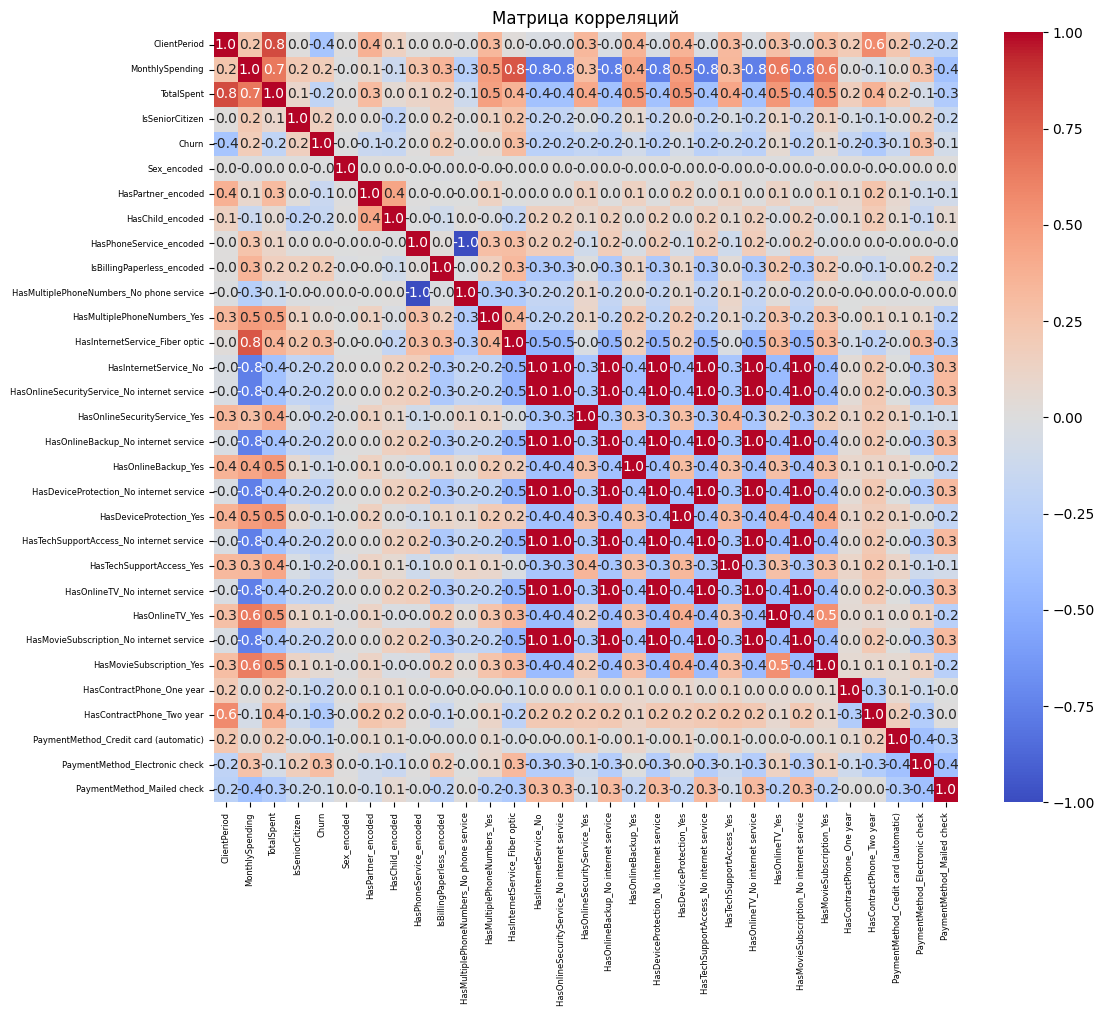

In [108]:
def corr_matr(data):
    plt.figure(figsize=(12, 10))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt='.1f', cmap='coolwarm', center=0)
    plt.title('Матрица корреляций')
    plt.xticks(fontsize=6)  # уменьшаем подписи и поворачиваем
    plt.yticks(fontsize=6)
    plt.show()
corr_matr(train_dataset)

Начну со страшного квадрата! Признаки описанные в pod_delete и MonthlySpending сильно коррелируют. Думаю удалить их, потому что, если у человека признак HasInternetService_No == True,
 то у него нет интернета -> остальные столбцы из списка ниже будут давать True. Надеюсь модели уловят эту закономерностью


In [109]:
pod_delete = [
    'HasOnlineSecurityService_No internet service',
    'HasOnlineBackup_No internet service',
    'HasDeviceProtection_No internet service',
    'HasTechSupportAccess_No internet service',
    'HasOnlineTV_No internet service',
    'HasMovieSubscription_No internet service'
]
train_dataset.drop(columns=pod_delete, axis = 1, inplace = True)


вижу высокую корреляцию между другими признаками(>= 0.7) - будем обрабатывать


1 пара: HasMultiplePhoneNumbers_No phone service; HasPhoneService_encoded. Корреляция 1
2 пара: HasInternetService_Fiber optic; MonthlySpending. Корреляция 0.8
3 пара: HasInternetService_No; MonthlySpending. Корреляция 0.8
4 пара: TotalSpent; ClientPeriod. Корреляция 0.8
5 пара: TotalSpent; MonthlySpending. Корреляция 0.7

Для 1 пары все просто: если нет телефонной службы - то, по идее, не может быть и нескольких номеров. Потеря признака HasMultiplePhoneNumbers_No phone service думаю не критична.
Для пар 2 - 5 посложнее, обе состовляющие пар считаю важными признаками - не хочу от них избавляться, поэтому попробую обойтись регуляризацией.
Также эти некоторые из признков дальше используя для создания новых.
Хотя для нашей задачи только линейные модели сильно не устойчивы при высокой корреляции. Дальше посмотрю на последствия регуляризации для бустинга и тд.
Если есть дельный совет - то буду благодарен услышать)

In [110]:
train_dataset.drop('HasMultiplePhoneNumbers_No phone service', axis = 1, inplace = True)

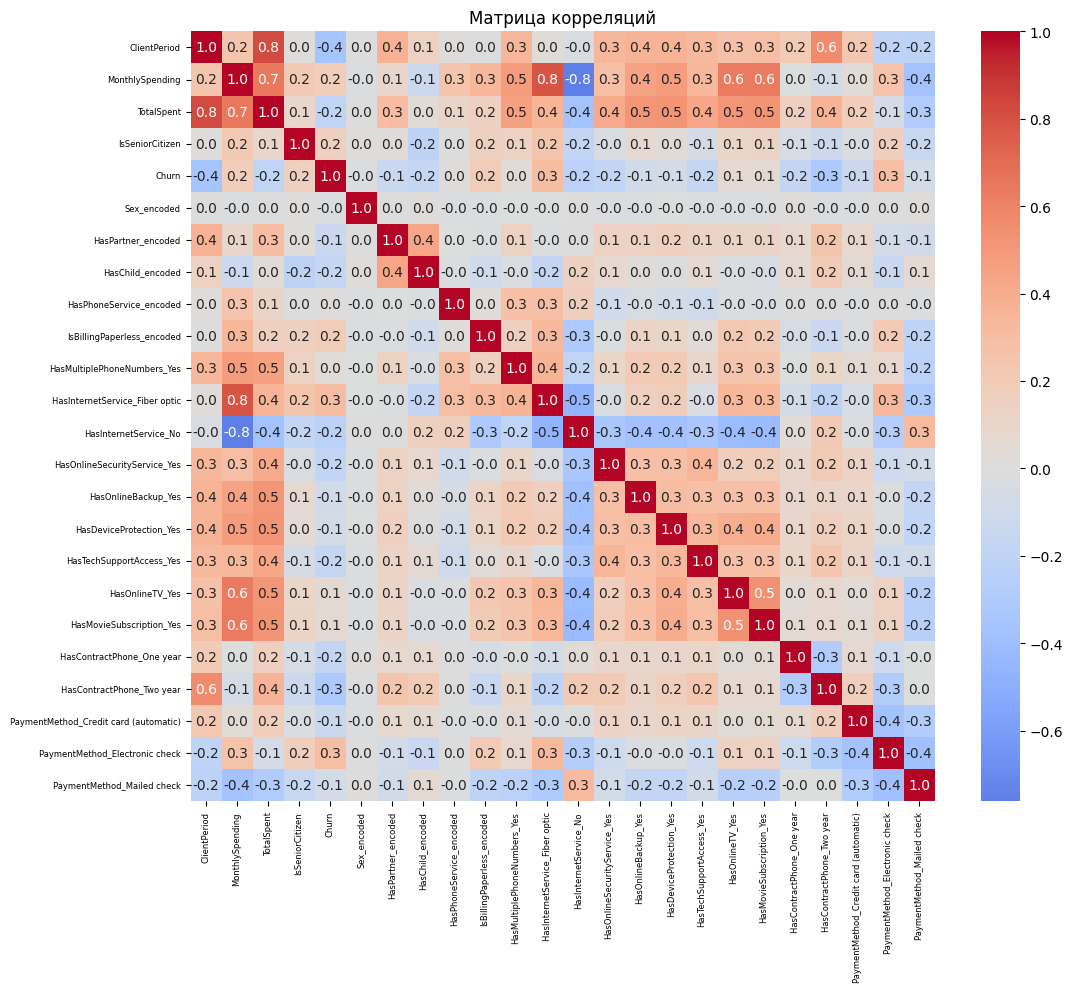

In [111]:
corr_matr(train_dataset)

Теперь выглядит куда лучше

# Создание признака

In [112]:
def premium_feature(data):
    data_simple = data.copy()

    # Клиент считается "лучшим", если выполняет 3 из 4 условий:
    conditions = [
        data['HasContractPhone_Two year'] == 1,                    # Двухлетний контракт
        data['HasInternetService_Fiber optic'] == 1,               # Оптоволокно
        data['PaymentMethod_Credit card (automatic)'] == 1,        # Автоплатеж
        data[['HasOnlineTV_Yes', 'HasMovieSubscription_Yes']].sum(axis=1) >= 2  # Сервисы
    ]

    condition_count = sum(conditions)
    data_simple['IsPremiumCustomer'] = (condition_count >= 3).astype(int)

    print(f"Доля лучших клиентов: {data_simple['IsPremiumCustomer'].mean():.2%}")

    return data_simple

train_dataset = premium_feature(train_dataset)

Доля лучших клиентов: 9.66%


# Обработка дупликатов

In [113]:
full_duplicates = train_dataset.duplicated().sum()
print(f"Полные дубликаты: {full_duplicates}")
# Нашли - убрали
train_dataset.drop_duplicates(subset=None, keep='first', inplace=True)
full_duplicates = train_dataset.duplicated().sum()
print(f"Полные дубликаты: {full_duplicates}")

Полные дубликаты: 14
Полные дубликаты: 0


# Обработка выбросов

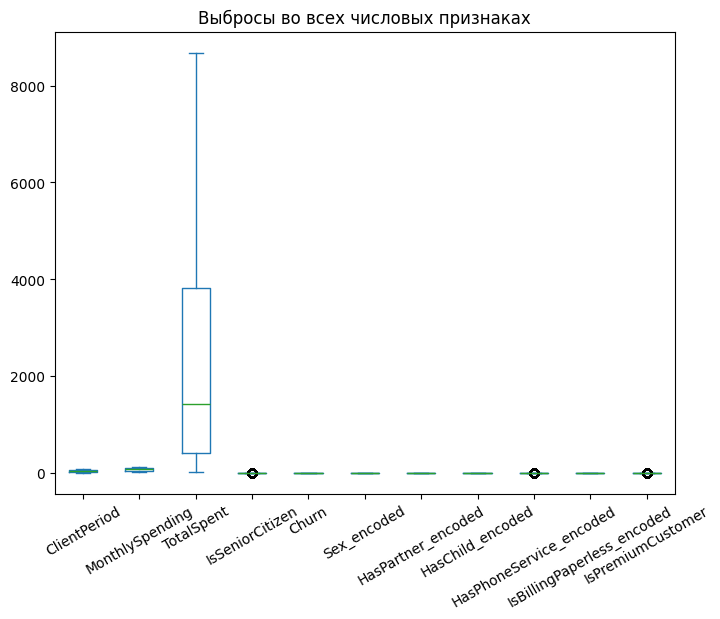

In [114]:
def mustache_case(data):
    data.select_dtypes(include='number').plot(kind='box', figsize=(8, 6))
    plt.title('Выбросы во всех числовых признаках')
    plt.xticks(rotation=30)
    plt.show()
mustache_case(train_dataset)

Масштаб немного не совпадает, поэтому не смотрибельно, щас логарифмируем


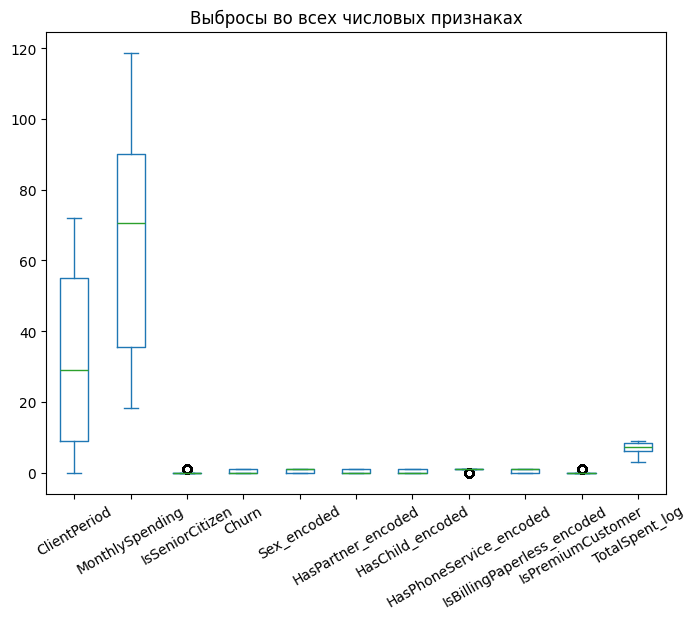

In [115]:
train_dataset['TotalSpent_log'] = np.log1p(train_dataset['TotalSpent'])
train_dataset.drop('TotalSpent', axis = 1, inplace = True)
mustache_case(train_dataset)


по итогу нет выбросов, отдыхаем

# Смотр дисбаланса классов в target

In [116]:
def raspred(data):
    churn_count = data['Churn'].value_counts()
    churn_percent = data['Churn'].value_counts(normalize=True)

    print("Распределение Churn:")
    print(f"0 (нет оттока): {churn_count[0]} записей ")
    print(f"1 (есть отток): {churn_count[1]} записей ")
raspred(train_dataset)

Распределение Churn:
0 (нет оттока): 3894 записей 
1 (есть отток): 1374 записей 



дисбланс есть, не настолько страшный, чтобы сильно заморачиваться.
Поэтому использую стратификацию и аргумент balanced для линейных моделей


# Нормализую числовые признаки

In [117]:
from sklearn.preprocessing import StandardScaler
for_scaler = ['ClientPeriod', 'MonthlySpending', 'TotalSpent_log']
scaler = StandardScaler()
train_dataset[for_scaler] = scaler.fit_transform(train_dataset[for_scaler])

In [118]:
print(train_dataset.select_dtypes(include='number').describe().T)

                             count          mean       std       min  \
ClientPeriod                5268.0 -6.743952e-17  1.000095 -1.324267   
MonthlySpending             5268.0 -7.957863e-17  1.000095 -1.548647   
IsSeniorCitizen             5268.0  1.596431e-01  0.366310  0.000000   
Churn                       5268.0  2.608200e-01  0.439124  0.000000   
Sex_encoded                 5268.0  5.024677e-01  0.500041  0.000000   
HasPartner_encoded          5268.0  4.891800e-01  0.499930  0.000000   
HasChild_encoded            5268.0  3.048595e-01  0.460392  0.000000   
HasPhoneService_encoded     5268.0  9.011010e-01  0.298555  0.000000   
IsBillingPaperless_encoded  5268.0  5.960516e-01  0.490734  0.000000   
IsPremiumCustomer           5268.0  9.681093e-02  0.295728  0.000000   
TotalSpent_log              5268.0 -2.677349e-16  1.000095 -2.586979   

                                 25%       50%       75%       max  
ClientPeriod               -0.957326 -0.141902  0.918149  1.611260

Пойдет

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

# Подготовка тестовых данных

In [119]:
test_dataset['TotalSpent'] = pd.to_numeric(test_dataset['TotalSpent'], errors='coerce')
test_dataset['TotalSpent'] = test_dataset['TotalSpent'].fillna(test_dataset['TotalSpent'].median())

# не все категории повторились, вылезала ошибка - импровизируем
for col in test_dataset.select_dtypes(include='object'):
    count = len(test_dataset[col].unique())
    if count == 2:
        mask = test_dataset[col].isin(LE_encoder.classes_)
        # Создаем новую колонку и заполняем значениями только для известных категорий
        test_dataset[col + '_encoded'] = -1  # значение по умолчанию для новых категорий
        test_dataset.loc[mask, col + '_encoded'] = LE_encoder.transform(test_dataset.loc[mask, col])
        test_dataset.drop(columns=[col], axis=1, inplace=True)

test_dataset = OHE(test_dataset)

new_pod_delete = [col for col in pod_delete if col in test_dataset.columns]
test_dataset.drop(columns=new_pod_delete, axis=1, inplace=True)

test_dataset = premium_feature(test_dataset)

test_dataset['TotalSpent_log'] = np.log1p(test_dataset['TotalSpent'])
test_dataset.drop('TotalSpent', axis=1, inplace=True)
test_dataset[for_scaler] = scaler.transform(test_dataset[for_scaler])

test_dataset = test_dataset[train_dataset.drop('Churn', axis=1).columns]

Доля лучших клиентов: 8.46%


In [120]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [121]:
def log_reg_train(train_dataset):
    X = train_dataset.drop('Churn', axis=1)
    y = train_dataset['Churn']

    Cs = [100, 10, 1, 0.1, 0.01, 0.001]

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    model_val = LogisticRegressionCV(
        Cs=Cs,
        cv=StratifiedKFold(5, shuffle=True, random_state=42),
        scoring='roc_auc',
        class_weight='balanced',
        random_state=42,
        max_iter=1000,
        refit=True
    )
    model_val.fit(X_train, y_train)
    y_pred_proba = model_val.predict_proba(X_val)[:, 1]

    print("ROC-AUC:", roc_auc_score(y_val, y_pred_proba))
    print("Лучший C:", model_val.C_[0])

    return model_val

final_model = log_reg_train(train_dataset)

ROC-AUC: 0.8513572178783988
Лучший C: 1.0


Выпишите какое лучшее качество и с какими параметрами вам удалось получить

**После кода указал!**

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [122]:
!pip install catboost

In [127]:
from catboost import CatBoostClassifier

train_data = pd.read_csv("./train.csv")
test_data = pd.read_csv("./test.csv")

def podbor_param(X_train, y_train, X_val, y_val, cat_cols):
    print("\nПодбор параметров")
    best_score = 0
    best_params = {}

    for n_trees in [100, 500, 1000]:
        for lr in [0.01, 0.05, 0.1]:
            model = CatBoostClassifier(
                n_estimators=n_trees,
                learning_rate=lr,
                cat_features=cat_cols,
                random_state=42,
                verbose=False
            )
            model.fit(X_train, y_train)
            y_pred = model.predict_proba(X_val)[:, 1]
            score = roc_auc_score(y_val, y_pred)

            print(f"Деревьев: {n_trees}, LR: {lr} -> ROC-AUC: {score:.4f}")

            if score > best_score:
                best_score = score
                best_params = {'n_estimators': n_trees, 'learning_rate': lr}

    return best_params, best_score

def koshka_boost(train_data, test_data):
    train_data['TotalSpent'] = pd.to_numeric(train_data['TotalSpent'], errors='coerce')
    train_data['TotalSpent'].fillna(train_data['TotalSpent'].median(), inplace=True)

    test_data['TotalSpent'] = pd.to_numeric(test_data['TotalSpent'], errors='coerce')
    test_data['TotalSpent'].fillna(test_data['TotalSpent'].median(), inplace=True)

    X = train_data.drop('Churn', axis=1)
    y = train_data['Churn']
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

    # Категориальные признаки
    cat_cols = [
        'Sex',
        'IsSeniorCitizen',
        'HasPartner',
        'HasChild',
        'HasPhoneService',
        'HasMultiplePhoneNumbers',
        'HasInternetService',
        'HasOnlineSecurityService',
        'HasOnlineBackup',
        'HasDeviceProtection',
        'HasTechSupportAccess',
        'HasOnlineTV',
        'HasMovieSubscription',
        'HasContractPhone',
        'IsBillingPaperless',
        'PaymentMethod'
    ]

    # CatBoost с настройками по умолчанию
    print("CatBoost по умолчанию")
    model_default = CatBoostClassifier(cat_features=cat_cols, random_state=42, verbose=100)
    model_default.fit(X_train, y_train)

    y_pred_default = model_default.predict_proba(X_val)[:, 1]
    print(f"ROC-AUC: {roc_auc_score(y_val, y_pred_default):.4f}")

    best_params, best_score = podbor_param(X_train, y_train, X_val, y_val, cat_cols)
    print(f"\nЛучшие: {best_params}")
    print(f"ROC-AUC: {best_score:.4f}")

koshka_boost(train_data, test_data)

/tmp/ipython-input-3115229584.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['TotalSpent'].fillna(train_data['TotalSpent'].median(), inplace=True)
/tmp/ipython-input-3115229584.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

CatBoost по умолчанию
Learning rate set to 0.019062
0:	learn: 0.6795793	total: 42.3ms	remaining: 42.2s
100:	learn: 0.4041579	total: 2.12s	remaining: 18.9s
200:	learn: 0.3831890	total: 3.94s	remaining: 15.7s
300:	learn: 0.3739345	total: 6.01s	remaining: 14s
400:	learn: 0.3655062	total: 7.29s	remaining: 10.9s
500:	learn: 0.3545685	total: 8.74s	remaining: 8.7s
600:	learn: 0.3435183	total: 10.2s	remaining: 6.79s
700:	learn: 0.3329911	total: 11.8s	remaining: 5.04s
800:	learn: 0.3247382	total: 13.3s	remaining: 3.3s
900:	learn: 0.3166637	total: 14.8s	remaining: 1.63s
999:	learn: 0.3094496	total: 17.2s	remaining: 0us
ROC-AUC: 0.8235

Подбор параметров
Деревьев: 100, LR: 0.01 -> ROC-AUC: 0.8009
Деревьев: 100, LR: 0.05 -> ROC-AUC: 0.8241
Деревьев: 100, LR: 0.1 -> ROC-AUC: 0.8274
Деревьев: 500, LR: 0.01 -> ROC-AUC: 0.8292
Деревьев: 500, LR: 0.05 -> ROC-AUC: 0.8214
Деревьев: 500, LR: 0.1 -> ROC-AUC: 0.8095
Деревьев: 1000, LR: 0.01 -> ROC-AUC: 0.8292
Деревьев: 1000, LR: 0.05 -> ROC-AUC: 0.8135
Дере

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить


ВАШ ОТВЕТ

Лучшие: {'n_estimators': 500, 'learning_rate': 0.01} ROC-AUC: 0.8292

# Предсказания

In [128]:
def final_logreg(test_dataset, model):
    submission = pd.read_csv("./submission.csv")
    test_predictions = model.predict_proba(test_dataset)[:, 1]
    submission['Churn'] = test_predictions
    submission.to_csv('submission_final.csv', index=False)

final_model = log_reg_train(train_dataset)
final_logreg(test_dataset, final_model)

ROC-AUC: 0.8513572178783988
Лучший C: 1.0


# Удачи!